## Basics of Data Analysis,  November 15, 2017

This work is intended to synthesize concepts of Data Analysis that have been presented to me in classes, books and other written materials.  In no way do I claim any sort of originality to the material here, just that it is organized in a manner that I understand and find useful.  Please feel free to point out errors, or suggestions for improvement, to my Twitter alias, @lagerratrobe.

### What is Data Analysis?

Simply put, Data Analysis is the term used to describe the process of examining data for the purpose of obtaining insights from it and then communicating them to others.  This process is usually broken down into 5 components:

  1. Form a question
  2. Find/Wrangle data
  3. Explore the data
  4. Analyze the data
  5. Communicate results of analysis
  
Sometimes the order of the steps is changed, for example it might be necessary to Explore the data before you can Wrangle it to suit the needs of your analysis.  Sometimes you might not even go through all steps.  You might stop at the Data Exploration or even Wrangling step because you find that your data is unsuitable, but usually all of the steps are present when analyzing a data set.


### Goal of Data Analysis

This can be many things, but generally it is to describe whether various factors have worked together to produce a certain outcome, to quantitatively describe how those factors relate to one another, and in some cases to create a model of those interactions which can be used to predict how future members of a data set will behave.  The end result of an analysis will usually be charts and figures that represent the data in various ways and that 'captures its essence'.  In cases where the desire is to predict future behavior, numerical models and programs might also be part of the end result.


### What is Data?

Data comes in an almost infinite variety of forms, but for our purposes it consists mostly of observations which are recorded in some fashion that allows us to collect them and review them at a later date.  Data can generally be broken down into 2 types; Structured Data, which is comprised of clearly definable data types expressed in a pattern that makes them searchable and for which a data model can be defined; and Unstructured Data, which is sometime jokingly referred to as "everything else".  A classic example of a Structured Data set would be a spreadsheet with data stored in rows and columns.  An example of Unstructured Data would be a photograph or all the text of a book.  A key point to keep in mind is that Unstructured Data often is highly structured, but either has not yet been modeled, or the means of modeling it have not yet been discovered.  For the 2 examples above of Unstructured Data, there now exist many ways of extracting, organizing and analyzing data from them.  The methods and techniques covered here are intended for use on Structured Data sets.

### Data Types

In order to accurately and efficiently analyze a data set, it is important to identify what types of data are in it.  When looking at a data set for the first time, identify whether the data falls into the following cateories:

*  Quantitative: can be expressed as a number and quantified
    1. *Discrete*: cannot be subdivided into smaller chunks, integer (ie. number of children, or pets, in a family)
    2. *Continuous*: can be subdivided into smaller amounts, real number (ie. weight of an object, length )  
*  Qualitative: expressed as text
    1.  *Binary*: Can only be represented in 2 ways (ie. on or off, true or false, faulty or non-faulty)
    2.  *Nominal*: Can take on more than 2 values, but have no order (ie. defect category, religion, race)
    3.  *Ordinal*: Can take more than 2 values and has a natural order (ie. A-F letter grades, 1-10 survey scale)
    4.  *Categorical*: Sometimes viewed as a subset of qualitative data types, but useful to recognize.

__NOTE:__ "data type" in this section should not be confused with the representation, or storage type of an observation.  For example, as mentioned above, *Discrete* data should be represented as an integer, while *Continuous* data would be represented as a real number or double.  Qualitative data can always be stored as character or string data, even when it is made up of numbers, as in the "1-10 Survey scale" example.  Often, data that is imported from CSV files, or which has gone through other ETL processes, will need to have it's representation type changed. This is easy to do in most software packages and a key component of Data Wrangling.

Knowing what data type a particular observation is helps you to determine what types of questions can be asked of it later.


In [43]:
#Import pandas, matplotlib and seaborn

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
vehicle    32 non-null object
mpg        32 non-null float64
cyl        32 non-null int64
disp       32 non-null float64
hp         32 non-null int64
drat       32 non-null float64
wt         32 non-null float64
qsec       32 non-null float64
vs         32 non-null int64
am         32 non-null int64
gear       32 non-null int64
carb       32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Metadata

```
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

mpg  - Miles/(US) gallon
cyl  -Number of cylinders
disp - Displacement (cu.in.)
hp   - Gross horsepower
drat - Rear axle ratio
wt   - Weight (1000 lbs)
qsec - 1/4 mile time
vs   - V/S
am   - Transmission (0 = automatic, 1 = manual)
gear - Number of forward gears
carb - Number of carburetors
```

In [5]:
# 2 rows of the data
mtcars.iloc[:2,:]

,vehicle,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [6]:
# Rename some of the more esoteric data fields

mtcars.rename(columns={'drat': 'axle_ratio', 'am': 'manual', 'vs': 'inline'}, inplace=True)

In [7]:
# 2 rows of data again

mtcars.iloc[:2,:]

,vehicle,mpg,cyl,disp,hp,axle_ratio,wt,qsec,inline,manual,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [8]:
mtcars.columns.tolist()

['vehicle',
 'mpg',
 'cyl',
 'disp',
 'hp',
 'axle_ratio',
 'wt',
 'qsec',
 'inline',
 'manual',
 'gear',
 'carb']

In [39]:
mtcars.mpg.sort_values().head()

15    10.4
14    10.4
23    13.3
6     14.3
16    14.7
Name: mpg, dtype: float64

In [73]:
?sb.set

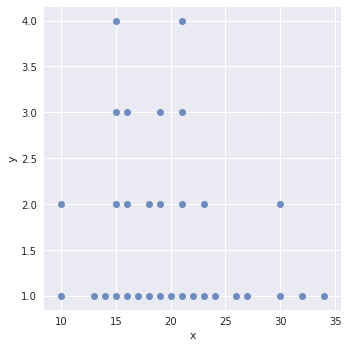

In [74]:

from collections import defaultdict

def make_dot_plot(column):
    counter = defaultdict(int)
    numbers = []
    count = []
    for value in column:
        value = round(value)
        counter[value] += 1
        numbers.append(value)
        count.append(counter[value])
    x_values = np.array(numbers).astype(int)
    y_values = np.array(count).astype(int)
    df = pd.DataFrame({'x':x_values, 'y':y_values})
    sb.lmplot(x='x', y='y', data=df, ci=None, fit_reg=False)

make_dot_plot(mtcars.mpg)
    

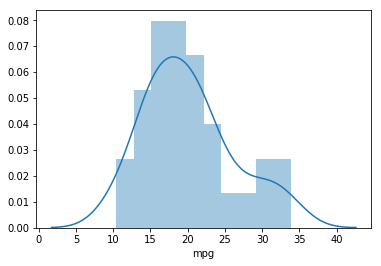

In [25]:
sb.distplot(mtcars.mpg, bins=10)

25.0